### Merge data
One dataframe that contains county-level data associated with HIV Incidence is created by merging data from:
* amfAR (The Foundation of AIDS Research)
* CAMP (Emory Coalition for Applied Modeling for Prevention)
* ACS (The American Community Survey)

This process is based on Eric Logue's [Forecasting HIV Infections](https://github.com/elogue01/Forecasting-HIV-Infections) capstone project.

In [1]:
import pandas as pd

### amfAR data

In [2]:
#load Amfar opioid and HIV data, add county code
opiod_df = pd.read_table('data/amfAR/countydata.tsv',header=0)
opiod_df['county_code'] = opiod_df.STATEFP*1000 + opiod_df.COUNTYFP # build a county code column
opiod_df['county_code'] = opiod_df.county_code.astype(int)

In [3]:
opiod_df.head()

,STATEFP,COUNTYFP,YEAR,INDICATOR,VALUE,COUNTY,STATE,STATEABBREVIATION,county_code
0,1,1,2017,bup_phys,2.0,Autauga County,Alabama,AL,1001
1,1,3,2017,bup_phys,13.0,Baldwin County,Alabama,AL,1003
2,1,5,2017,bup_phys,0.0,Barbour County,Alabama,AL,1005
3,1,7,2017,bup_phys,0.0,Bibb County,Alabama,AL,1007
4,1,9,2017,bup_phys,1.0,Blount County,Alabama,AL,1009


The INDICATOR and VALUE columns contain HIV related data.

In [4]:
#make changes to the amfar dataframe
#convert from long to wide format
index_lst = ['county_code', 'COUNTY', 'STATEABBREVIATION', 'YEAR']
col_lst = ['INDICATOR']
opiod_df_wide = opiod_df.pivot_table(values='VALUE', index=index_lst, columns=col_lst).reset_index()

In [5]:
opiod_df_wide.head()

INDICATOR,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,CDC_consult,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,...,drugdeathrate_est,drugdeaths,drugdep,mme_percap,nonmedpain,num_SSPs,partD30dayrxrate,pctunins,pctunmetneed,vulnerable_rank
0,1001,Autauga County,AL,1999,NaN,NaN,NaN,NaN,NaN,NaN,...,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,Autauga County,AL,2000,NaN,NaN,NaN,NaN,NaN,NaN,...,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1001,Autauga County,AL,2001,NaN,NaN,NaN,NaN,NaN,NaN,...,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001,Autauga County,AL,2002,NaN,NaN,NaN,NaN,NaN,NaN,...,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1001,Autauga County,AL,2003,NaN,NaN,NaN,NaN,NaN,NaN,...,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Focus on just the HIV related data, from 2008 onward
opiod_df_wide = opiod_df_wide[opiod_df_wide['YEAR'] >= 2008] # subset for years that have hiv data
cols_to_drop = ['CDC_consult', 'vulnerable_rank']
#, 'num_SSPs', 'bup_phys', 'drugdep', 'pctunmetneed', 'nonmedpain']
opiod_df_wide.drop(cols_to_drop, axis=1, inplace=True) # drop unnecessary columns

In [7]:
opiod_df_wide.head()

INDICATOR,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,drugdeathrate,drugdeathrate_est,drugdeaths,drugdep,mme_percap,nonmedpain,num_SSPs,partD30dayrxrate,pctunins,pctunmetneed
9,1001,Autauga County,AL,2008,0.0,8.0,19.8,NaN,NaN,0.0,...,NaN,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1001,Autauga County,AL,2009,0.0,7.0,17.1,NaN,NaN,0.0,...,NaN,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1001,Autauga County,AL,2010,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,8.1,NaN,NaN,1050.8,NaN,NaN,NaN,NaN,NaN
12,1001,Autauga County,AL,2011,0.0,7.0,15.5,NaN,NaN,0.0,...,NaN,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1001,Autauga County,AL,2012,0.0,7.0,15.5,NaN,NaN,0.0,...,NaN,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


By default pandas doesn't show all the columns (shows ... instead).  Set max columns so that all can be inspected.

In [8]:
pd.get_option("display.max_columns")

20

In [9]:
pd.set_option("display.max_columns", 100)

In [10]:
opiod_df_wide.head()

INDICATOR,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SA_fac,SMAT_fac,TMAT_fac,bup_phys,drugdeathrate,drugdeathrate_est,drugdeaths,drugdep,mme_percap,nonmedpain,num_SSPs,partD30dayrxrate,pctunins,pctunmetneed
9,1001,Autauga County,AL,2008,0.0,8.0,19.8,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1001,Autauga County,AL,2009,0.0,7.0,17.1,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1001,Autauga County,AL,2010,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,54742.0,0.0,0.0,0.0,NaN,NaN,8.1,NaN,NaN,1050.8,NaN,NaN,NaN,NaN,NaN
12,1001,Autauga County,AL,2011,0.0,7.0,15.5,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,55255.0,0.0,0.0,0.0,NaN,NaN,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1001,Autauga County,AL,2012,0.0,7.0,15.5,NaN,NaN,0.0,NaN,1.0,0.0,0.0,NaN,55027.0,1.0,0.0,0.0,NaN,NaN,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Many NaNs in the data.  Fill numerical where appropriate, per Eric.

In [11]:
fill_nan_cols = ['HIVdiagnoses', 'HIVincidence', 'HIVprevalence',
                 'PLHIV', 'drugdeathrate', 'drugdeaths']
opiod_df_wide[fill_nan_cols] = opiod_df_wide[fill_nan_cols].fillna(0) #fill NaNs for suppressed data with zeroes

In [12]:
opiod_df_wide.head()

INDICATOR,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SA_fac,SMAT_fac,TMAT_fac,bup_phys,drugdeathrate,drugdeathrate_est,drugdeaths,drugdep,mme_percap,nonmedpain,num_SSPs,partD30dayrxrate,pctunins,pctunmetneed
9,1001,Autauga County,AL,2008,0.0,8.0,19.8,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,6.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1001,Autauga County,AL,2009,0.0,7.0,17.1,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,6.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1001,Autauga County,AL,2010,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,54742.0,0.0,0.0,0.0,NaN,0.0,8.1,0.0,NaN,1050.8,NaN,NaN,NaN,NaN,NaN
12,1001,Autauga County,AL,2011,0.0,7.0,15.5,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,55255.0,0.0,0.0,0.0,NaN,0.0,8.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1001,Autauga County,AL,2012,0.0,7.0,15.5,0.0,NaN,0.0,NaN,1.0,0.0,0.0,0.0,55027.0,1.0,0.0,0.0,NaN,0.0,8.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Subset data to 2015
opiod_df_15 = opiod_df_wide[opiod_df_wide['YEAR'] == 2015]

In [14]:
opiod_df_15.head()

INDICATOR,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SA_fac,SMAT_fac,TMAT_fac,bup_phys,drugdeathrate,drugdeathrate_est,drugdeaths,drugdep,mme_percap,nonmedpain,num_SSPs,partD30dayrxrate,pctunins,pctunmetneed
16,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,1.0,2.0,0.0,0.0,103.0,55035.0,2.0,0.0,0.0,NaN,0.0,10.1,0.0,NaN,1084.0,NaN,NaN,2.34,10.1,NaN
35,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,3.0,1.0,0.0,0.0,282.0,203690.0,2.0,0.0,0.0,NaN,21.1,20.1,43.0,NaN,1148.5,NaN,NaN,2.56,13.0,NaN
54,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,1.0,1.0,0.0,0.0,97.0,26270.0,1.0,0.0,0.0,NaN,0.0,6.1,0.0,NaN,577.6,NaN,NaN,1.46,15.5,NaN
73,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,0.0,1.0,1.0,0.0,37.0,22561.0,1.0,1.0,0.0,NaN,0.0,14.1,0.0,NaN,563.0,NaN,NaN,0.39,9.7,NaN
92,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,1.0,1.0,0.0,0.0,46.0,57676.0,1.0,0.0,0.0,NaN,0.0,16.1,11.0,NaN,459.0,NaN,NaN,1.22,11.6,NaN


In [15]:
pd.options.mode.chained_assignment = None  # default='warn', get rid of annoying warning associated with dropping below
# drop columns having no 2015 data, will be extraploated from following years later
opiod_df_15.drop(['num_SSPs', 'bup_phys', 'drugdep', 'pctunmetneed', 'nonmedpain'], axis=1, inplace=True)

In [16]:
opiod_df_15.head()

INDICATOR,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SA_fac,SMAT_fac,TMAT_fac,drugdeathrate,drugdeathrate_est,drugdeaths,mme_percap,partD30dayrxrate,pctunins
16,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,1.0,2.0,0.0,0.0,103.0,55035.0,2.0,0.0,0.0,0.0,10.1,0.0,1084.0,2.34,10.1
35,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,3.0,1.0,0.0,0.0,282.0,203690.0,2.0,0.0,0.0,21.1,20.1,43.0,1148.5,2.56,13.0
54,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,1.0,1.0,0.0,0.0,97.0,26270.0,1.0,0.0,0.0,0.0,6.1,0.0,577.6,1.46,15.5
73,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,0.0,1.0,1.0,0.0,37.0,22561.0,1.0,1.0,0.0,0.0,14.1,0.0,563.0,0.39,9.7
92,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,1.0,1.0,0.0,0.0,46.0,57676.0,1.0,0.0,0.0,0.0,16.1,11.0,459.0,1.22,11.6


In [17]:
# get esimates for num_SSPs, bug_phys, drug_dep, pctunmetneed, and nonmedpain from following years

#subset opioid related data from one year only
#number of needle exchange programs (num_SSPs)
opiod_df_wide_17 = opiod_df_wide[opiod_df_wide['YEAR'] == 2017]
df_num_SSP = opiod_df_wide_17[['num_SSPs', 'county_code']]

#number of doctors licensed to rx Buprenorphine (bup_phys)
df_bup_phys = opiod_df_wide_17[['bup_phys', 'county_code']]

#percent with drug dependency (drug_dep)
opiod_df_wide_16 = opiod_df_wide[opiod_df_wide['YEAR'] == 2016]
df_drugdep = opiod_df_wide_16[['drugdep', 'county_code']]

#percent unmet drug treatment need (pctunmetneed)
df_pctunmetneed = opiod_df_wide_16[['pctunmetneed', 'county_code']]

#percent taken pain meds for nonmedical use (nonmedpain)
df_nonmedpain = opiod_df_wide_16[['nonmedpain', 'county_code']]

In [18]:
# merge these values back into 2015 dataframe
#merge opioid related data back to the 2015 dataframe
opiod_df_15 = opiod_df_15.merge(df_num_SSP, on='county_code')
opiod_df_15 = opiod_df_15.merge(df_bup_phys, on='county_code')
opiod_df_15 = opiod_df_15.merge(df_drugdep, on='county_code')
opiod_df_15 = opiod_df_15.merge(df_pctunmetneed, on='county_code')
opiod_df_15 = opiod_df_15.merge(df_nonmedpain, on='county_code')

In [19]:
opiod_df_15.head()

INDICATOR,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SA_fac,SMAT_fac,TMAT_fac,drugdeathrate,drugdeathrate_est,drugdeaths,mme_percap,partD30dayrxrate,pctunins,num_SSPs,bup_phys,drugdep,pctunmetneed,nonmedpain
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,1.0,2.0,0.0,0.0,103.0,55035.0,2.0,0.0,0.0,0.0,10.1,0.0,1084.0,2.34,10.1,0.0,2.0,2.56,95.70,5.12
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,3.0,1.0,0.0,0.0,282.0,203690.0,2.0,0.0,0.0,21.1,20.1,43.0,1148.5,2.56,13.0,0.0,13.0,2.54,91.34,5.27
2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,1.0,1.0,0.0,0.0,97.0,26270.0,1.0,0.0,0.0,0.0,6.1,0.0,577.6,1.46,15.5,0.0,0.0,2.54,91.34,5.27
3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,0.0,1.0,1.0,0.0,37.0,22561.0,1.0,1.0,0.0,0.0,14.1,0.0,563.0,0.39,9.7,0.0,0.0,2.58,91.86,5.62
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,1.0,1.0,0.0,0.0,46.0,57676.0,1.0,0.0,0.0,0.0,16.1,11.0,459.0,1.22,11.6,0.0,1.0,2.58,91.86,5.62


### CAMP data

In [20]:
#load Men who have sex with men (MSM) estimate data
msm_df = pd.read_csv("data/CAMP/US_MSM_Estimates_Data_2013.csv")    #load the data
msm_df['county_code'] = msm_df.STATEFP*1000 + msm_df.COUNTYFP  # build a county code column
msm_df['county_code'] = msm_df.county_code.astype(int)
msm_df['%msm12month'] = 100 * (msm_df.MSM12MTH / msm_df.ADULTMEN) # build a %MSM within last 12 months column
msm_df['%msm5yr'] = 100 * (msm_df.MSM5YEAR / msm_df.ADULTMEN)     # build a %MSM within last 5years column

In [21]:
msm_df.head()

,REGCODE,DIVCODE,STATEFP,COUNTYFP,CSACODE,CBSACODE,METDCODE,METMICSA,CENTOUTL,ADULTMEN,MSM12MTH,MSM5YEAR,county_code,%msm12month,%msm5yr
0,3,6,1,1,NaN,33860.0,NaN,1.0,NaN,19410,333,514,1001,1.715611,2.648120
1,3,6,1,3,380.0,19300.0,NaN,1.0,1.0,69724,925,1429,1003,1.326659,2.049509
2,3,6,1,5,NaN,NaN,NaN,NaN,NaN,11567,82,127,1005,0.708913,1.097951
3,3,6,1,7,142.0,13820.0,NaN,1.0,2.0,9508,119,184,1007,1.251578,1.935212
4,3,6,1,9,142.0,13820.0,NaN,1.0,2.0,21368,601,928,1009,2.812617,4.342943


In [22]:
cols_to_drop = ['REGCODE', 'DIVCODE', 'STATEFP', 'COUNTYFP', 'CSACODE', 
                'CBSACODE','METDCODE', 'METMICSA', 'CENTOUTL']
msm_df.drop(cols_to_drop, axis=1, inplace=True) #drop all unneeded columns
msm_df.head()

,ADULTMEN,MSM12MTH,MSM5YEAR,county_code,%msm12month,%msm5yr
0,19410,333,514,1001,1.715611,2.648120
1,69724,925,1429,1003,1.326659,2.049509
2,11567,82,127,1005,0.708913,1.097951
3,9508,119,184,1007,1.251578,1.935212
4,21368,601,928,1009,2.812617,4.342943


### ACS data

In [23]:
#unemplyment data
df_employment = pd.read_csv("data/ACS_14_5YR_employment/ACS_14_5YR_S2301_with_ann.csv", 
                            encoding = "ISO-8859-1", skiprows=1)
df_employment = df_employment[['Id2', 'Unemployment rate; Estimate; Population 16 years and over']]
df_employment.columns = ['county_code', 'unemployment_rate']
df_employment.head()

,county_code,unemployment_rate
0,1001,8.5
1,1003,8.6
2,1005,14.2
3,1007,10.9
4,1009,9.3


In [24]:
#poverty data
df_poverty = pd.read_csv("data/ACS_14_5YR_poverty/ACS_14_5YR_S1701_with_ann.csv", 
                         encoding = "ISO-8859-1", skiprows=1)
df_poverty = df_poverty[['Id2', 'Percent below poverty level; Estimate; Population for whom poverty status is determined']]
df_poverty.columns = ['county_code', 'poverty_rate']
df_poverty.head()

/Users/cindywong/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13,14,19,20,193,194,265,266) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,county_code,poverty_rate
0,1001,12.8
1,1003,13.8
2,1005,24.1
3,1007,17.0
4,1009,17.3


In [25]:
#income data
df_income = pd.read_csv("data/ACS_14_5YR_income/ACS_14_5YR_S1901_with_ann.csv", 
                        encoding = "ISO-8859-1", skiprows=1)
df_income = df_income[['Id2', 'Households; Estimate; Total']]
df_income.columns = ['county_code', 'household_income']
df_income.head()

,county_code,household_income
0,1001,20304
1,1003,73058
2,1005,9145
3,1007,7078
4,1009,20934


**Note:** Insurance data is also included in `data/ACS_14_5Y_health_insur_coverage` but 
reading and cleaning the data is left to the user, if desired.

### Merging all the dataframes together into one dataframe

In [26]:
#merge asfAR hiv/opioid data with CAMP MSM data
df_main = opiod_df_15.merge(msm_df, on='county_code')

#merge in ACS data
df_main = df_main.merge(df_employment, on='county_code')
df_main = df_main.merge(df_poverty, on='county_code')
df_main = df_main.merge(df_income, on='county_code')

In [27]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3140 entries, 0 to 3139
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   county_code        3140 non-null   int64  
 1   COUNTY             3140 non-null   object 
 2   STATEABBREVIATION  3140 non-null   object 
 3   YEAR               3140 non-null   int64  
 4   AMAT_fac           3140 non-null   float64
 5   HIVdiagnoses       3140 non-null   float64
 6   HIVincidence       3140 non-null   float64
 7   HIVprevalence      3140 non-null   float64
 8   MH_fac             3140 non-null   float64
 9   Med_AMAT_fac       3140 non-null   float64
 10  Med_MH_fac         3140 non-null   float64
 11  Med_SA_fac         3140 non-null   float64
 12  Med_SMAT_fac       3140 non-null   float64
 13  Med_TMAT_fac       3140 non-null   float64
 14  PLHIV              3140 non-null   float64
 15  Population         3140 non-null   float64
 16  SA_fac             3140 

In [28]:
df_main.head()

,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SA_fac,SMAT_fac,TMAT_fac,drugdeathrate,drugdeathrate_est,drugdeaths,mme_percap,partD30dayrxrate,pctunins,num_SSPs,bup_phys,drugdep,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,1.0,2.0,0.0,0.0,103.0,55035.0,2.0,0.0,0.0,0.0,10.1,0.0,1084.0,2.34,10.1,0.0,2.0,2.56,95.70,5.12,19410,333,514,1.715611,2.648120,8.5,12.8,20304
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,3.0,1.0,0.0,0.0,282.0,203690.0,2.0,0.0,0.0,21.1,20.1,43.0,1148.5,2.56,13.0,0.0,13.0,2.54,91.34,5.27,69724,925,1429,1.326659,2.049509,8.6,13.8,73058
2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,1.0,1.0,0.0,0.0,97.0,26270.0,1.0,0.0,0.0,0.0,6.1,0.0,577.6,1.46,15.5,0.0,0.0,2.54,91.34,5.27,11567,82,127,0.708913,1.097951,14.2,24.1,9145
3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,0.0,1.0,1.0,0.0,37.0,22561.0,1.0,1.0,0.0,0.0,14.1,0.0,563.0,0.39,9.7,0.0,0.0,2.58,91.86,5.62,9508,119,184,1.251578,1.935212,10.9,17.0,7078
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,1.0,1.0,0.0,0.0,46.0,57676.0,1.0,0.0,0.0,0.0,16.1,11.0,459.0,1.22,11.6,0.0,1.0,2.58,91.86,5.62,21368,601,928,2.812617,4.342943,9.3,17.3,20934


In [10]:
import pandas as pd
hiv_data = pd.read_csv('Data/hiv_data.csv')


In [11]:
pd.set_option('display.max_columns',50)

In [12]:
import numpy as np
value=hiv_data['mme_percap'].median()

hiv_data['mme_percap'].fillna(value=value,inplace=True)
hiv_data['mme_percap'].isna().sum()

0

In [15]:
hiv_data[hiv_data['county_code']==15005]

,Unnamed: 0,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SA_fac,SMAT_fac,TMAT_fac,drugdeathrate,drugdeathrate_est,drugdeaths,mme_percap,partD30dayrxrate,pctunins,num_SSPs,bup_phys,drugdep,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
547,547,15005,Kalawao County,HI,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,0.0,0.0,0.0,0.0,24.1,0.0,648.7,NaN,10.7,0.0,0.0,NaN,NaN,NaN,34,0,0,0.0,0.0,0.0,17.6,46


In [17]:
hiv_data=hiv_data.drop(axis=1,index=547)

In [21]:
hiv_data.reset_index(inplace=True)

In [26]:
hiv_data.drop(['index','Unnamed: 0'],axis=1,inplace=True)

In [27]:
hiv_data

,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SA_fac,SMAT_fac,TMAT_fac,drugdeathrate,drugdeathrate_est,drugdeaths,mme_percap,partD30dayrxrate,pctunins,num_SSPs,bup_phys,drugdep,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,1.0,2.0,0.0,0.0,103.0,55035.0,2.0,0.0,0.0,0.0,10.1,0.0,1084.0,2.34,10.1,0.0,2.0,2.56,95.70,5.12,19410,333,514,1.715611,2.648120,8.5,12.8,20304
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,3.0,1.0,0.0,0.0,282.0,203690.0,2.0,0.0,0.0,21.1,20.1,43.0,1148.5,2.56,13.0,0.0,13.0,2.54,91.34,5.27,69724,925,1429,1.326659,2.049509,8.6,13.8,73058
2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,1.0,1.0,0.0,0.0,97.0,26270.0,1.0,0.0,0.0,0.0,6.1,0.0,577.6,1.46,15.5,0.0,0.0,2.54,91.34,5.27,11567,82,127,0.708913,1.097951,14.2,24.1,9145
3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,0.0,1.0,1.0,0.0,37.0,22561.0,1.0,1.0,0.0,0.0,14.1,0.0,563.0,0.39,9.7,0.0,0.0,2.58,91.86,5.62,9508,119,184,1.251578,1.935212,10.9,17.0,7078
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,1.0,1.0,0.0,0.0,46.0,57676.0,1.0,0.0,0.0,0.0,16.1,11.0,459.0,1.22,11.6,0.0,1.0,2.58,91.86,5.62,21368,601,928,2.812617,4.342943,9.3,17.3,20934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,56037,Sweetwater County,WY,2015,0.0,0.0,0.0,86.5,3.0,0.0,3.0,5.0,1.0,0.0,31.0,44693.0,6.0,1.0,0.0,0.0,18.1,0.0,1044.8,1.59,13.5,0.0,2.0,2.08,87.02,3.38,16941,177,274,1.044803,1.617378,5.6,12.2,16687
3135,56039,Teton County,WY,2015,0.0,0.0,0.0,50.5,2.0,0.0,2.0,1.0,0.0,0.0,10.0,23073.0,1.0,0.0,0.0,0.0,8.1,0.0,387.8,1.25,16.9,0.0,2.0,2.03,89.16,3.42,9172,50,78,0.545137,0.850414,3.6,8.5,7873
3136,56041,Uinta County,WY,2015,0.0,0.0,0.0,0.0,4.0,0.0,4.0,1.0,0.0,0.0,0.0,20819.0,1.0,0.0,0.0,0.0,18.1,0.0,1067.8,2.50,14.0,0.0,2.0,2.08,87.02,3.38,7401,75,116,1.013377,1.567356,5.8,14.2,7557
3137,56043,Washakie County,WY,2015,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,8334.0,1.0,0.0,0.0,0.0,16.1,0.0,1444.0,2.11,16.9,0.0,0.0,2.09,86.12,3.26,3141,17,27,0.541229,0.859599,7.9,14.2,3461


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

%matplotlib inline

plt.style.use('ggplot')

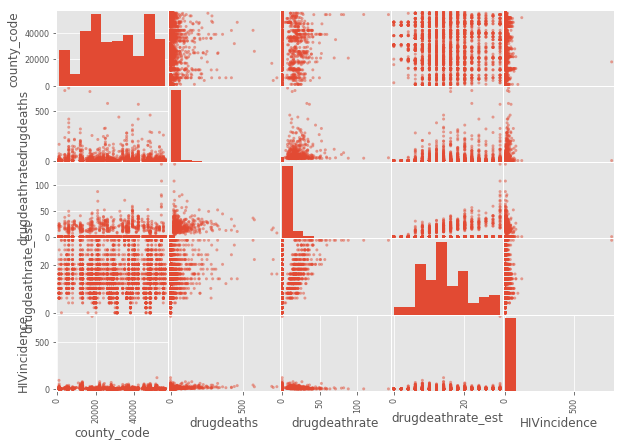

In [30]:
ax = scatter_matrix(df_main[['county_code','drugdeaths', 'drugdeathrate', 'drugdeathrate_est', 'HIVincidence']], figsize=(10,7))

In [31]:
df_main.shape

(3140, 38)

In [32]:
def scatter(x, ax):
    ax = sns.scatterplot(x=x, y='HIVincidence', data=df_main)
    plt.show()

In [50]:
df_main.columns

Index(['county_code', 'COUNTY', 'STATEABBREVIATION', 'YEAR', 'AMAT_fac',
       'HIVdiagnoses', 'HIVincidence', 'HIVprevalence', 'MH_fac',
       'Med_AMAT_fac', 'Med_MH_fac', 'Med_SA_fac', 'Med_SMAT_fac',
       'Med_TMAT_fac', 'PLHIV', 'Population', 'SA_fac', 'SMAT_fac', 'TMAT_fac',
       'drugdeathrate', 'drugdeathrate_est', 'drugdeaths', 'mme_percap',
       'partD30dayrxrate', 'pctunins', 'num_SSPs', 'bup_phys', 'drugdep',
       'pctunmetneed', 'nonmedpain', 'ADULTMEN', 'MSM12MTH', 'MSM5YEAR',
       '%msm12month', '%msm5yr', 'unemployment_rate', 'poverty_rate',
       'household_income'],
      dtype='object')

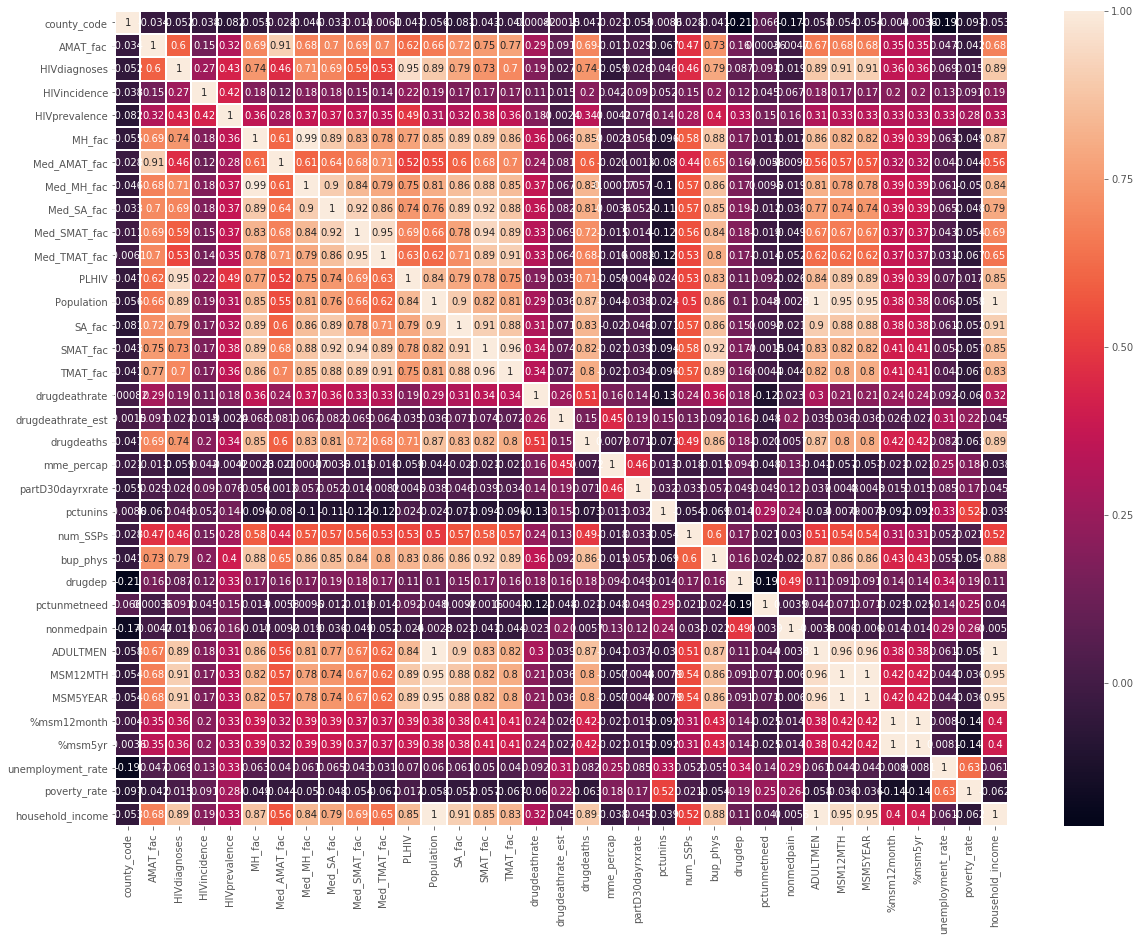

In [58]:
x = df_main.drop(['COUNTY', 'STATEABBREVIATION', 'YEAR'], axis=1)

fig, ax = plt.subplots(figsize=(20,15))

sns.heatmap(x.corr(), linewidths=1, annot=True)

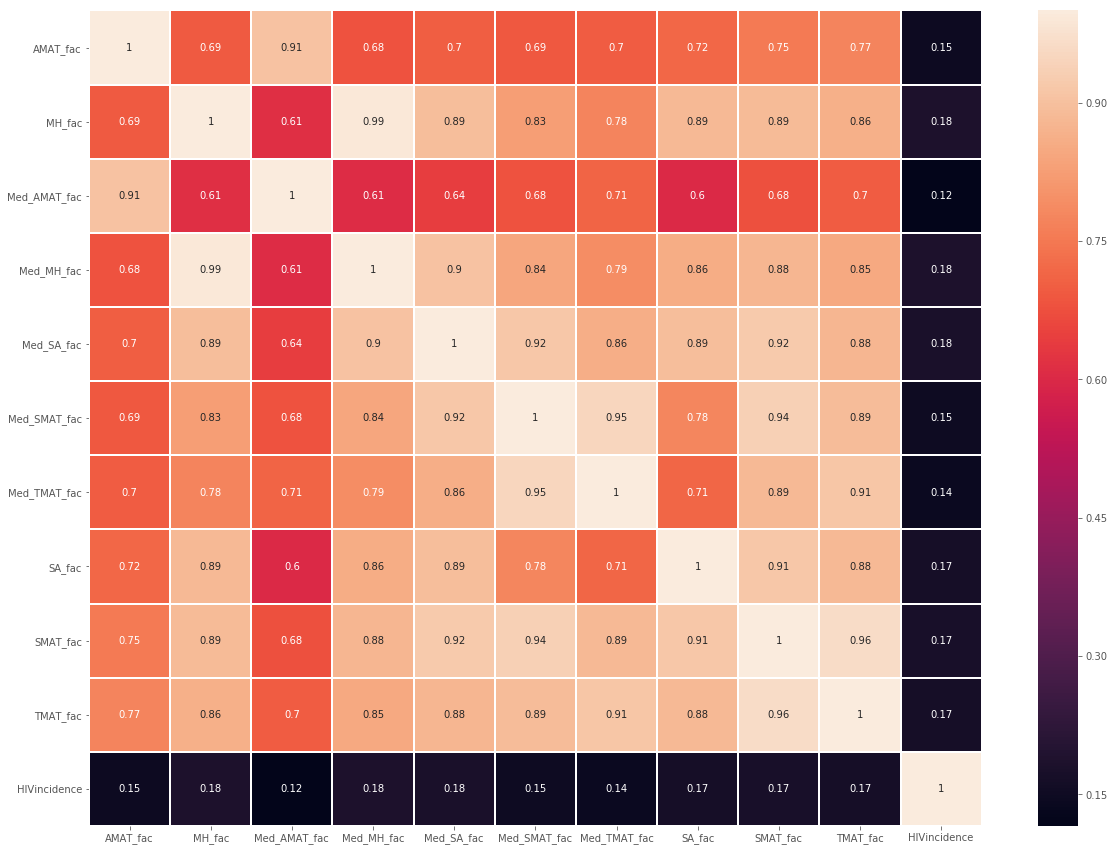

In [52]:
fac = df_main[['AMAT_fac','MH_fac',
       'Med_AMAT_fac', 'Med_MH_fac', 'Med_SA_fac', 'Med_SMAT_fac',
       'Med_TMAT_fac', 'SA_fac', 'SMAT_fac', 'TMAT_fac','HIVincidence']]

fig, ax = plt.subplots(figsize=(20,15))

sns.heatmap(fac.corr(), linewidths=1, annot=True)

In [ ]:
fac = df_main[['AMAT_fac','MH_fac',
       'Med_AMAT_fac', 'Med_MH_fac', 'Med_SA_fac', 'Med_SMAT_fac',
       'Med_TMAT_fac', 'SA_fac', 'SMAT_fac', 'TMAT_fac','HIVincidence']]

fig, ax = plt.subplots(figsize=(20,15))

sns.heatmap(fac.corr(), linewidths=1, annot=True)

In [57]:
df_main.columns

Index(['county_code', 'COUNTY', 'STATEABBREVIATION', 'YEAR', 'AMAT_fac',
       'HIVdiagnoses', 'HIVincidence', 'HIVprevalence', 'MH_fac',
       'Med_AMAT_fac', 'Med_MH_fac', 'Med_SA_fac', 'Med_SMAT_fac',
       'Med_TMAT_fac', 'PLHIV', 'Population', 'SA_fac', 'SMAT_fac', 'TMAT_fac',
       'drugdeathrate', 'drugdeathrate_est', 'drugdeaths', 'mme_percap',
       'partD30dayrxrate', 'pctunins', 'num_SSPs', 'bup_phys', 'drugdep',
       'pctunmetneed', 'nonmedpain', 'ADULTMEN', 'MSM12MTH', 'MSM5YEAR',
       '%msm12month', '%msm5yr', 'unemployment_rate', 'poverty_rate',
       'household_income'],
      dtype='object')

In [68]:
new_df = df_main[['HIVincidence', 'county_code', 'AMAT_fac', 'MH_fac', 'SA_fac', 'SMAT_fac', 
                  'TMAT_fac', 'drugdeathrate', 'mme_percap', 'pctunins', 'num_SSPs', 'drugdep', 
                  'pctunmetneed', 'MSM12MTH', '%msm12month', 'poverty_rate', 'household_income']]

In [65]:
df_main['ADULTMEN'].value_counts().sort_index()

34         1
53         1
142        1
157        1
165        1
          ..
1204728    1
1408797    1
1490581    1
1905622    1
3666190    1
Name: ADULTMEN, Length: 2988, dtype: int64

In [32]:
hiv_data1= hiv_data.copy()

In [33]:
hiv_data1=hiv_data1.drop(['HIVincidence','partD30dayrxrate'],axis=1)

In [34]:
hiv_data1

,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SA_fac,SMAT_fac,TMAT_fac,drugdeathrate,drugdeathrate_est,drugdeaths,mme_percap,pctunins,num_SSPs,bup_phys,drugdep,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
0,1001,Autauga County,AL,2015,0.0,5.0,225.5,1.0,0.0,1.0,2.0,0.0,0.0,103.0,55035.0,2.0,0.0,0.0,0.0,10.1,0.0,1084.0,10.1,0.0,2.0,2.56,95.70,5.12,19410,333,514,1.715611,2.648120,8.5,12.8,20304
1,1003,Baldwin County,AL,2015,0.0,15.0,163.9,4.0,0.0,3.0,1.0,0.0,0.0,282.0,203690.0,2.0,0.0,0.0,21.1,20.1,43.0,1148.5,13.0,0.0,13.0,2.54,91.34,5.27,69724,925,1429,1.326659,2.049509,8.6,13.8,73058
2,1005,Barbour County,AL,2015,0.0,0.0,436.0,1.0,0.0,1.0,1.0,0.0,0.0,97.0,26270.0,1.0,0.0,0.0,0.0,6.1,0.0,577.6,15.5,0.0,0.0,2.54,91.34,5.27,11567,82,127,0.708913,1.097951,14.2,24.1,9145
3,1007,Bibb County,AL,2015,0.0,0.0,191.9,0.0,0.0,0.0,1.0,1.0,0.0,37.0,22561.0,1.0,1.0,0.0,0.0,14.1,0.0,563.0,9.7,0.0,0.0,2.58,91.86,5.62,9508,119,184,1.251578,1.935212,10.9,17.0,7078
4,1009,Blount County,AL,2015,0.0,5.0,95.4,1.0,0.0,1.0,1.0,0.0,0.0,46.0,57676.0,1.0,0.0,0.0,0.0,16.1,11.0,459.0,11.6,0.0,1.0,2.58,91.86,5.62,21368,601,928,2.812617,4.342943,9.3,17.3,20934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,56037,Sweetwater County,WY,2015,0.0,0.0,86.5,3.0,0.0,3.0,5.0,1.0,0.0,31.0,44693.0,6.0,1.0,0.0,0.0,18.1,0.0,1044.8,13.5,0.0,2.0,2.08,87.02,3.38,16941,177,274,1.044803,1.617378,5.6,12.2,16687
3135,56039,Teton County,WY,2015,0.0,0.0,50.5,2.0,0.0,2.0,1.0,0.0,0.0,10.0,23073.0,1.0,0.0,0.0,0.0,8.1,0.0,387.8,16.9,0.0,2.0,2.03,89.16,3.42,9172,50,78,0.545137,0.850414,3.6,8.5,7873
3136,56041,Uinta County,WY,2015,0.0,0.0,0.0,4.0,0.0,4.0,1.0,0.0,0.0,0.0,20819.0,1.0,0.0,0.0,0.0,18.1,0.0,1067.8,14.0,0.0,2.0,2.08,87.02,3.38,7401,75,116,1.013377,1.567356,5.8,14.2,7557
3137,56043,Washakie County,WY,2015,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,8334.0,1.0,0.0,0.0,0.0,16.1,0.0,1444.0,16.9,0.0,0.0,2.09,86.12,3.26,3141,17,27,0.541229,0.859599,7.9,14.2,3461


In [35]:
from sklearn.model_selection import train_test_split
X = hiv_data.drop(['HIVincidence','partD30dayrxrate','COUNTY','STATEABBREVIATION'], axis=1)
y = hiv_data['HIVincidence']
X_train, X_test, y_train, y_test = train_test_split(X, y)
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HIVincidence   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     77.35
Date:                Fri, 17 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:23:09   Log-Likelihood:                -7725.3
No. Observations:                2354   AIC:                         1.552e+04
Df Residuals:                    2320   BIC:                         1.571e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
county_code        1.716e-05   9.24e-06      1.856      0.064   -9.67e-07    3.53e-05
YEAR                 -0.0027      0.002     -1.231      0.218      -0.007       0.002
AMAT_fac             -1.3071      0.946     -1.382      0.167      -3.162       0.547
HIVdiagnoses          0.1306      0.010     13.048      0.000       0.111       0.150
HIVprevalence         0.0283      0.001     29.417      0.000       0.026       0.030
MH_fac                0.5378      0.190      2.832      0.005       0.165       0.910
Med_AMAT_fac          2.2729      1.134      2.005      0.045       0.050       4.496
Med_MH_fac           -0.4807      0.207     -2.328      0.020      -0.886      -0.076
Med_SA_fac           -0.1010      0.121     -0.837      0.403      -0.338       0.136
Med_SMAT_fac         -0.1493      0.370     -0.404      0.686      -0.874       0.576
Med_TMAT_fac         -0.1236      0.519     -0.238      0.812      -1.141       0.893
PLHIV                -0.0038      0.000     -9.557      0.000      -0.005      -0.003
Population         -2.34e-08   1.22e-05     -0.002      0.998    -2.4e-05    2.39e-05
SA_fac                0.0329      0.066      0.500      0.617      -0.096       0.162
SMAT_fac              0.0560      0.299      0.188      0.851      -0.529       0.642
TMAT_fac              0.2218      0.406      0.546      0.585      -0.575       1.019
drugdeathrate         0.0462      0.017      2.718      0.007       0.013       0.080
drugdeathrate_est    -0.0944      0.025     -3.843      0.000      -0.143      -0.046
drugdeaths           -0.0134      0.009     -1.557      0.120      -0.030       0.003
mme_percap            0.0005      0.000      1.466      0.143      -0.000       0.001
pctunins              0.0609      0.030      2.004      0.045       0.001       0.120
num_SSPs              0.3605      0.423      0.852      0.394      -0.469       1.190
bup_phys              0.0576      0.017      3.407      0.001       0.024       0.091
drugdep              -0.2855      0.494     -0.578      0.563      -1.254       0.683
pctunmetneed          0.0340      0.046      0.731      0.465      -0.057       0.125
nonmedpain            0.3014      0.287      1.052      0.293      -0.261       0.863
ADULTMEN            -4.8e-05   3.63e-05     -1.321      0.187      -0.000    2.32e-05
MSM12MTH              0.0711      0.428      0.166      0.868      -0.768       0.911
MSM5YEAR             -0.0466      0.277     -0.168      0.866      -0.590       0.496
%msm12month           8.7030      8.283      1.051      0.294      -7.541      24.947
%msm5yr              -5.1338      5.357     -0.958      0.338     -15.638       5.371
unemployment_rate     0.0358      0.050      0.717      0.474      -0.062       0.134
poverty_rate         -0.0384      0.030     -1.268      0.205      -0.098

In [43]:
pval_cols=model.pvalues.index[model.pvalues < 0.05].values

In [45]:
data=hiv_data[pval_cols]

In [47]:
data.to_csv('Data/HIVdata.csv')

In [29]:
np.asarray(hiv_data)

array([[1001, 'Autauga County', 'AL', ..., 8.5, 12.8, 20304],
       [1003, 'Baldwin County', 'AL', ..., 8.6, 13.8, 73058],
       [1005, 'Barbour County', 'AL', ..., 14.2, 24.1, 9145],
       ...,
       [56041, 'Uinta County', 'WY', ..., 5.8, 14.2, 7557],
       [56043, 'Washakie County', 'WY', ..., 7.9, 14.2, 3461],
       [56045, 'Weston County', 'WY', ..., 3.6, 12.4, 2996]], dtype=object)

In [30]:
hiv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3139 entries, 0 to 3138
Data columns (total 38 columns):
county_code          3139 non-null int64
COUNTY               3139 non-null object
STATEABBREVIATION    3139 non-null object
YEAR                 3139 non-null int64
AMAT_fac             3139 non-null float64
HIVdiagnoses         3139 non-null float64
HIVincidence         3139 non-null float64
HIVprevalence        3139 non-null float64
MH_fac               3139 non-null float64
Med_AMAT_fac         3139 non-null float64
Med_MH_fac           3139 non-null float64
Med_SA_fac           3139 non-null float64
Med_SMAT_fac         3139 non-null float64
Med_TMAT_fac         3139 non-null float64
PLHIV                3139 non-null float64
Population           3139 non-null float64
SA_fac               3139 non-null float64
SMAT_fac             3139 non-null float64
TMAT_fac             3139 non-null float64
drugdeathrate        3139 non-null float64
drugdeathrate_est    3139 non-null floa

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))

sns.heatmap(x.corr(), linewidths=1)

In [59]:
df_main[['bup_phys', 'SMAT_fac']].head(50)

,bup_phys,SMAT_fac
0,2.0,0.0
1,13.0,0.0
2,0.0,0.0
3,0.0,1.0
4,1.0,0.0
5,0.0,0.0
6,0.0,0.0
7,9.0,3.0
8,1.0,0.0
9,2.0,0.0


In [61]:
df_main['bup_phys'].value_counts().head(50)

0.0      1561
1.0       394
2.0       232
3.0       134
4.0        95
5.0        90
8.0        55
7.0        51
6.0        43
9.0        38
14.0       29
10.0       28
15.0       24
11.0       23
13.0       21
12.0       19
22.0       13
19.0       13
16.0       12
20.0       11
21.0       11
18.0       11
26.0        8
28.0        8
31.0        7
23.0        7
47.0        7
24.0        7
25.0        6
33.0        6
17.0        6
29.0        6
39.0        6
41.0        5
27.0        5
36.0        5
52.0        5
35.0        4
30.0        4
71.0        3
69.0        3
232.0       3
58.0        3
72.0        3
63.0        3
73.0        3
45.0        3
115.0       3
38.0        3
75.0        3
Name: bup_phys, dtype: int64